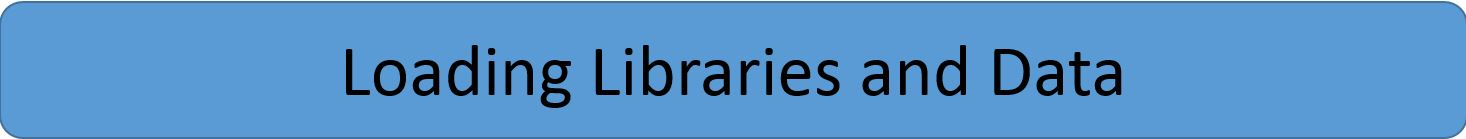

In [33]:
!pip install missingno


In [73]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno


In [74]:
train = pd.read_csv('COVID-19 Coronavirus.csv',header=None)

In [75]:
train.rename(columns={0:'Country', 
                      1:'Other names',
                      2:'ISO',
                      3:'Population',
                      4:'Continent',
                      5:'Total Cases',
                      6:'Total Deaths',
                      7:'TC1Mpop',
                      8:'TD1Mpop',
                      9:'Death percentage'},inplace=True)

In [76]:
train.drop(index=0,inplace=True)

In [77]:
train['Population']=train['Population'].map(int)
train['Total Cases']=train['Total Cases'].map(int)
train['Total Deaths']=train['Total Deaths'].map(int)
train['TC1Mpop']=train['TC1Mpop'].map(int)
train['TD1Mpop']=train['TD1Mpop'].map(int)
train['Death percentage']=train['Death percentage'].map(float)

This data transformation was necessary due to incorrect variable names in the dataset.

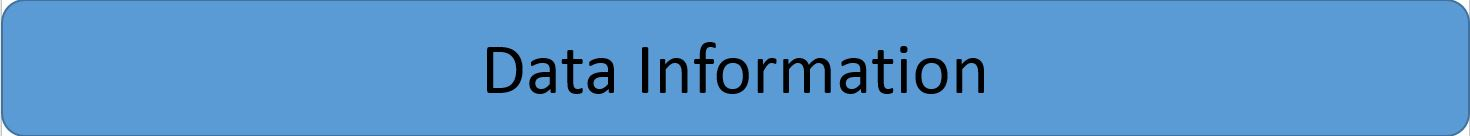

In [78]:
train

,Country,Other names,ISO,Population,Continent,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
1,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
2,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
3,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
4,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
5,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...,...,...,...,...
221,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
222,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
223,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
224,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120


In [79]:
train.columns

Index(['Country', 'Other names', 'ISO', 'Population', 'Continent',
       'Total Cases', 'Total Deaths', 'TC1Mpop', 'TD1Mpop',
       'Death percentage'],
      dtype='object')

* Country (Other names, ISO) is a distinct territorial body or political entity.It may be an independent sovereign state or part of a larger state, as a non-sovereign or formerly sovereign political division, a physical territory with a government, or a geographic region associated with sets of previously independent or differently associated peoples with distinct political characteristics. It is not inherently sovereign.
* In demographics, the term  population is often used to refer to the total number of humans currently living, and was estimated to have exceeded 7.9 billion as of November 2021. It took over two million years of human prehistory and history for the human population to reach one billion and only 200 years more to grow to 7 billion.
* A continent is any of several large landmasses. Generally identified by convention rather than any strict criteria, up to seven geographical regions are commonly regarded as continents. Ordered from largest in area to smallest, these seven regions are: Asia, Africa, North America, South America, Antarctica, Europe, and Australia. Our data includes continents such as Asia, Europe, Africa, Latin America and the Caribbean,Oceania, Northern America.
* Total cases - the number of infections in the country.
* Total deaths - the number of deaths in the selected country.
* Tot Cases//1M pop (Tot Deaths//1M pop) - the number of deaths in the selected country per 1 million population.
* Death percentage - the percentage of deaths among the diseased population.

## We need to look at the type of our data.

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 1 to 225
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           225 non-null    object 
 1   Other names       224 non-null    object 
 2   ISO               225 non-null    object 
 3   Population        225 non-null    int64  
 4   Continent         225 non-null    object 
 5   Total Cases       225 non-null    int64  
 6   Total Deaths      225 non-null    int64  
 7   TC1Mpop           225 non-null    int64  
 8   TD1Mpop           225 non-null    int64  
 9   Death percentage  225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


I propose to remove the signs of other names, ISO due to duplication of information.

In [81]:
train=train.drop(['Other names','ISO'],axis=1)

After this transformation, the table is a 225x8 data array, 6 features are numeric, 2 are categorical.

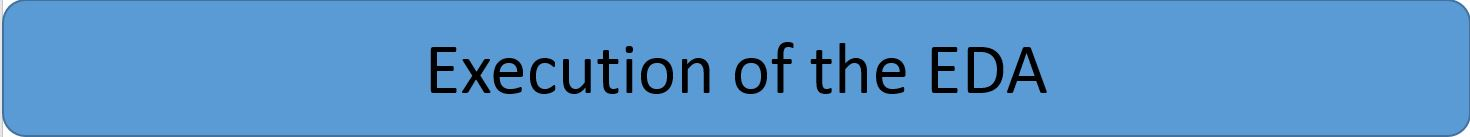

## Let's look at the statistics of the dataset

In [82]:
train.describe()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


Based on the statistics obtained, outliers are observed for the minimum and maximum values for each of the signs, in the future we will deal with the nature of these outliers.

## Let's look at the amount of missing data in the dataset.

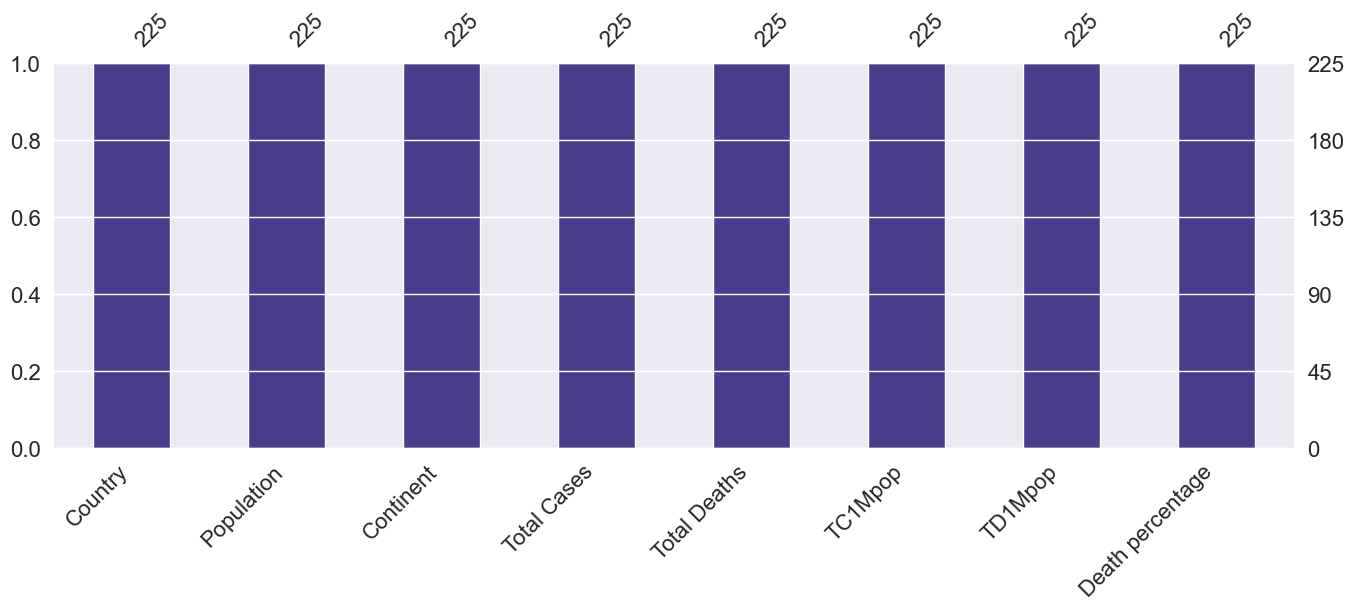

In [83]:
msno.bar(train, figsize = (16,5),color = "#483D8B")
plt.show()

In [84]:
train.isnull().sum()

Country             0
Population          0
Continent           0
Total Cases         0
Total Deaths        0
TC1Mpop             0
TD1Mpop             0
Death percentage    0
dtype: int64

There are no missing values in the dataset, which means that there will be no distortion of information during the correlation analysis.

## Let's do a little analysis on each of the features.

In [85]:
train.columns

Index(['Country', 'Population', 'Continent', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage'],
      dtype='object')

In [86]:
columns=['Population', 'Total Cases', 'Total Deaths',
       'TC1Mpop', 'TD1Mpop', 'Death percentage']

## Anti-rating in the fight against covid

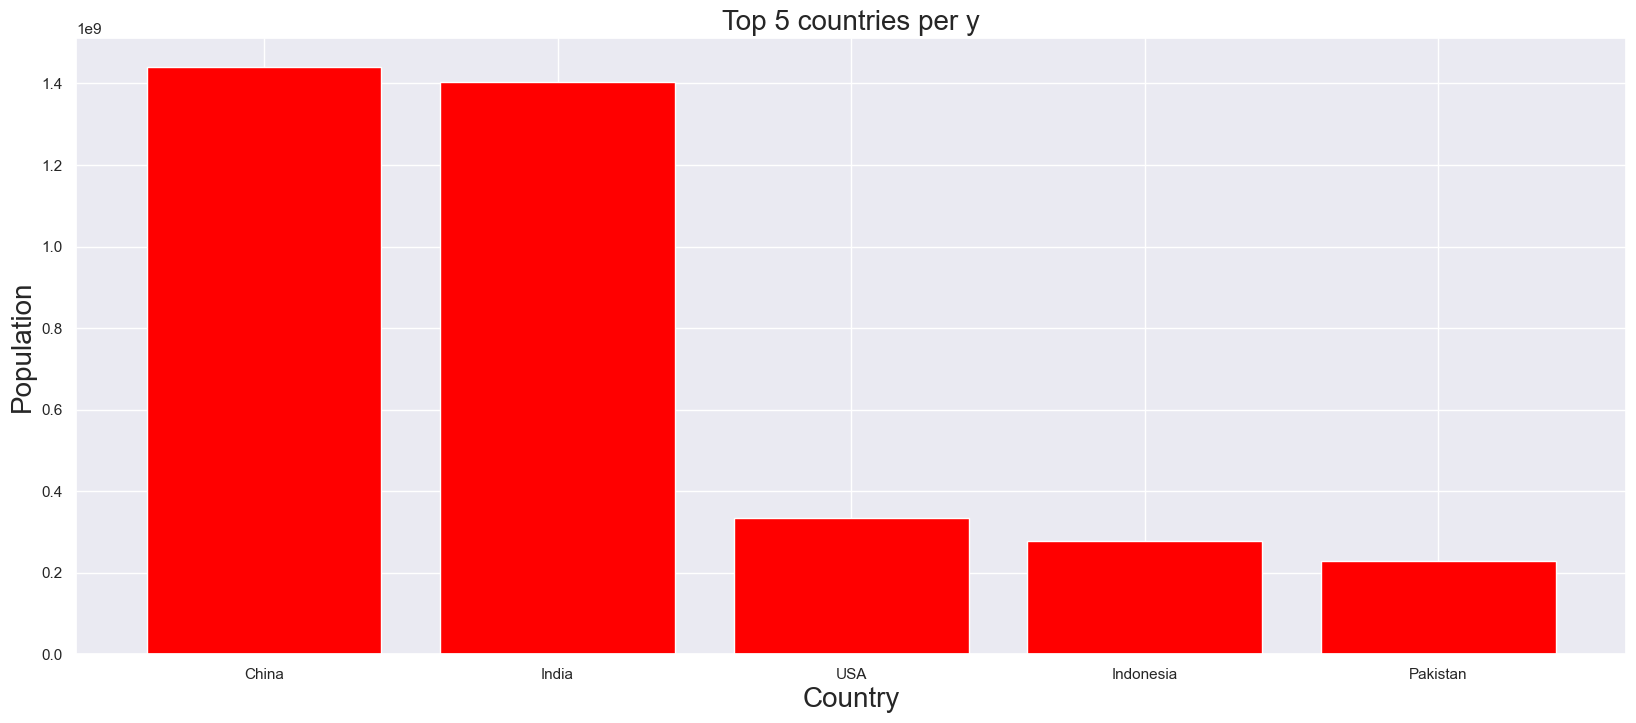

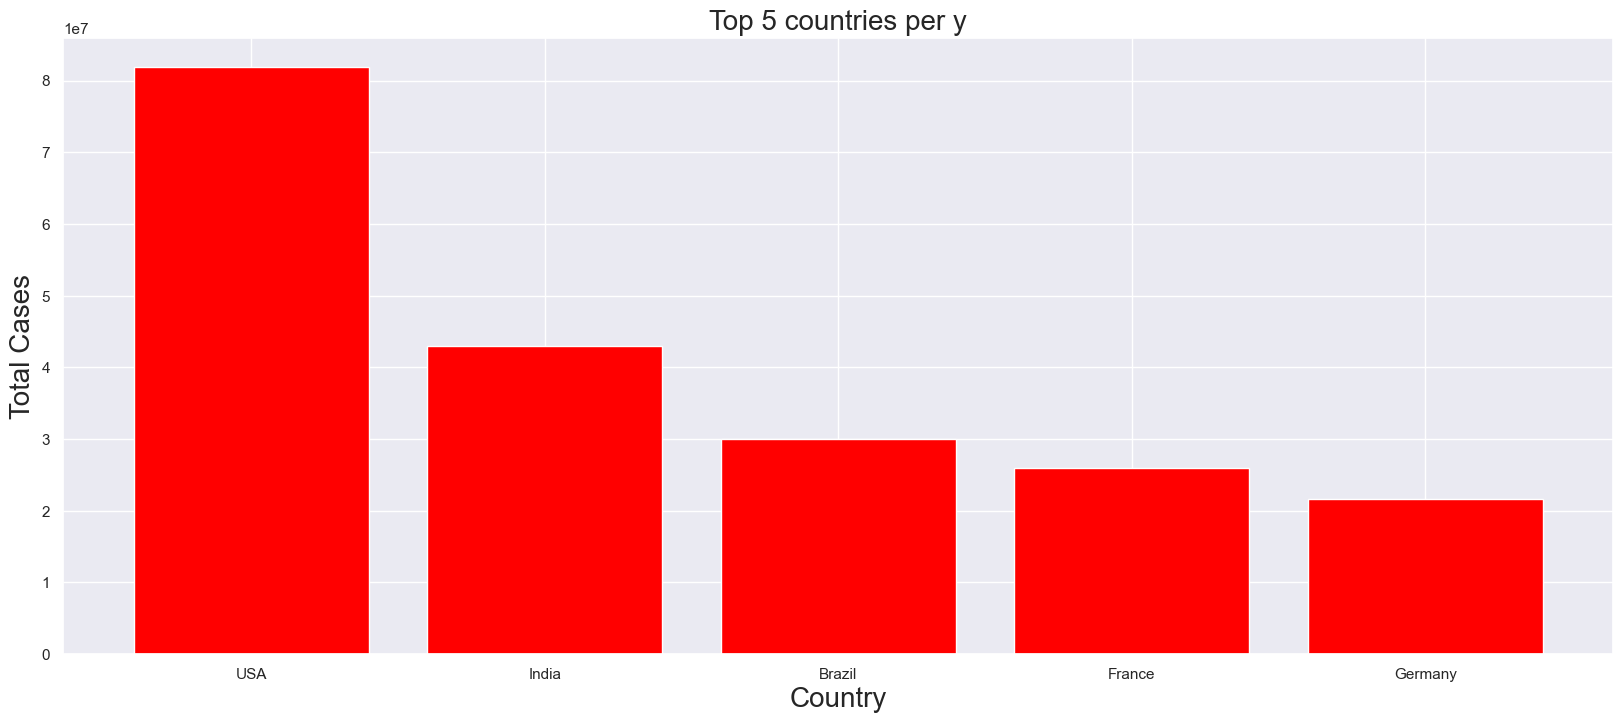

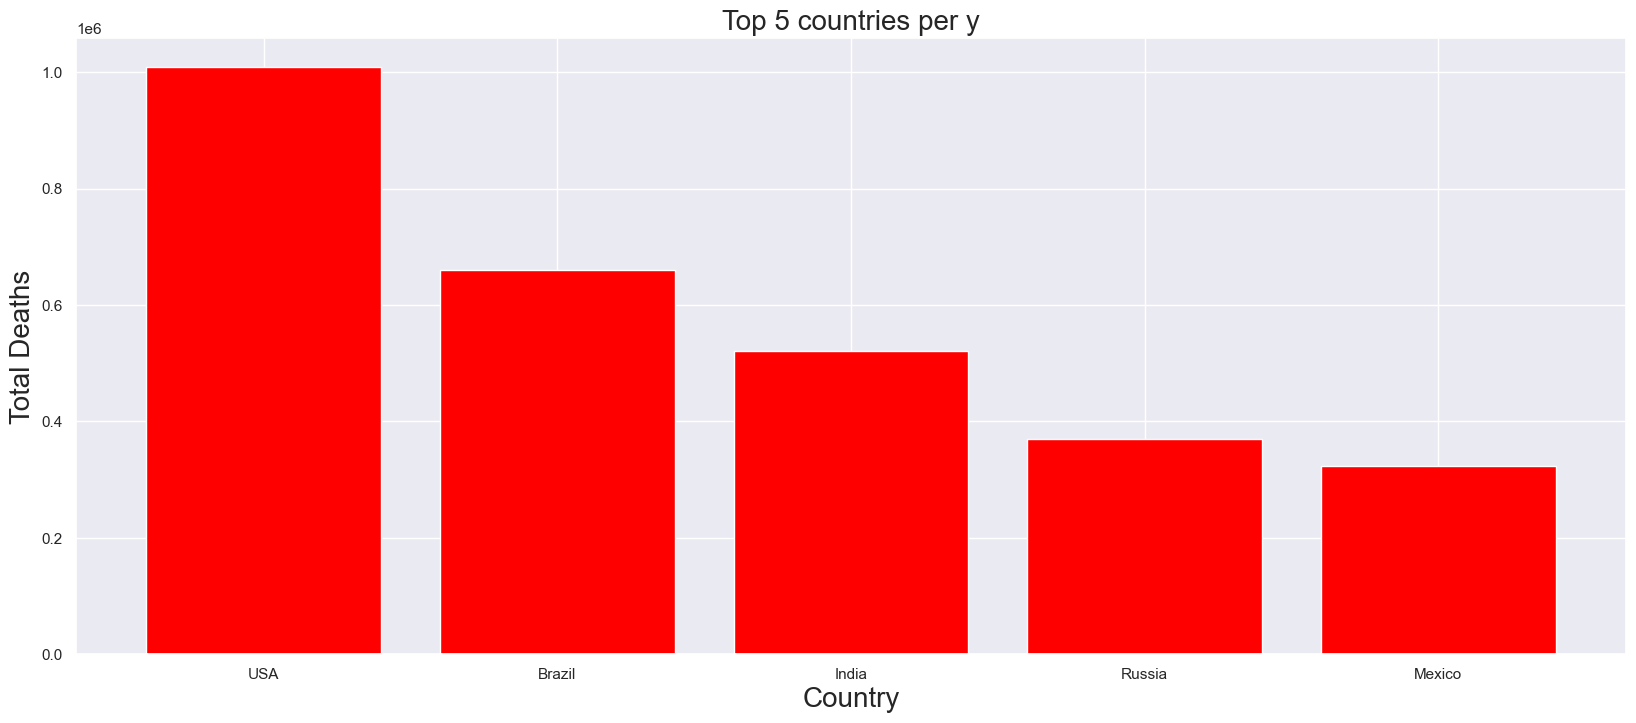

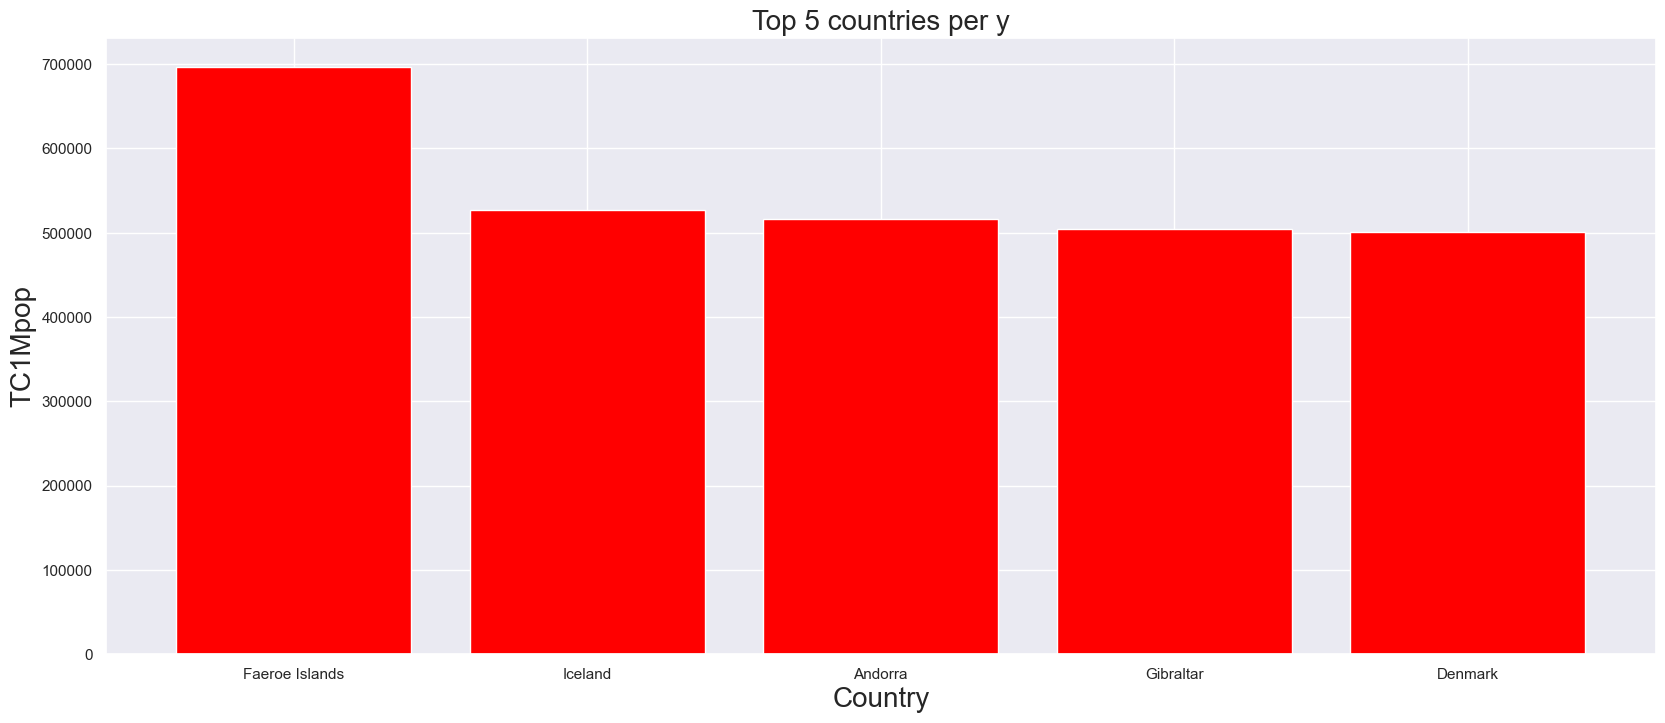

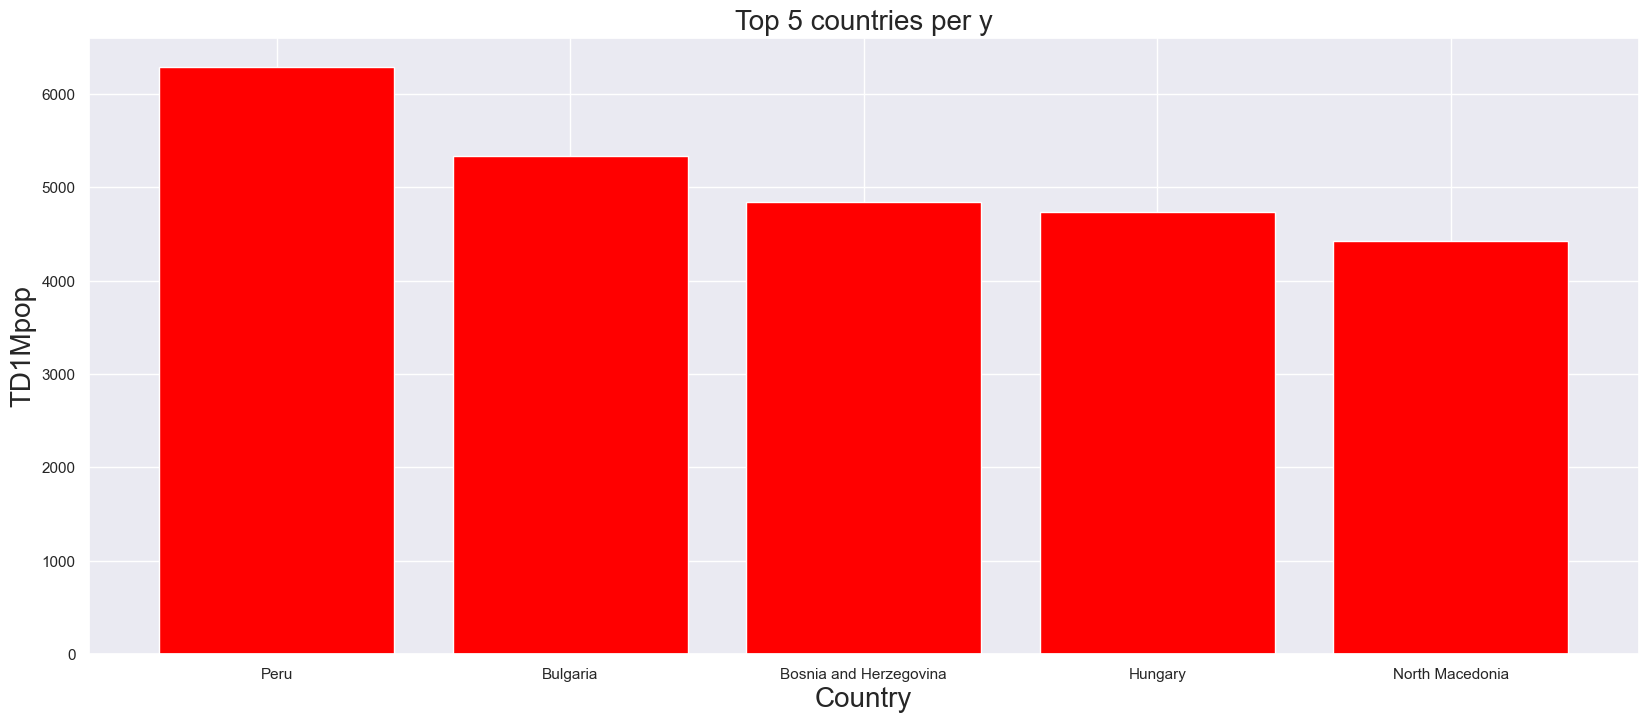

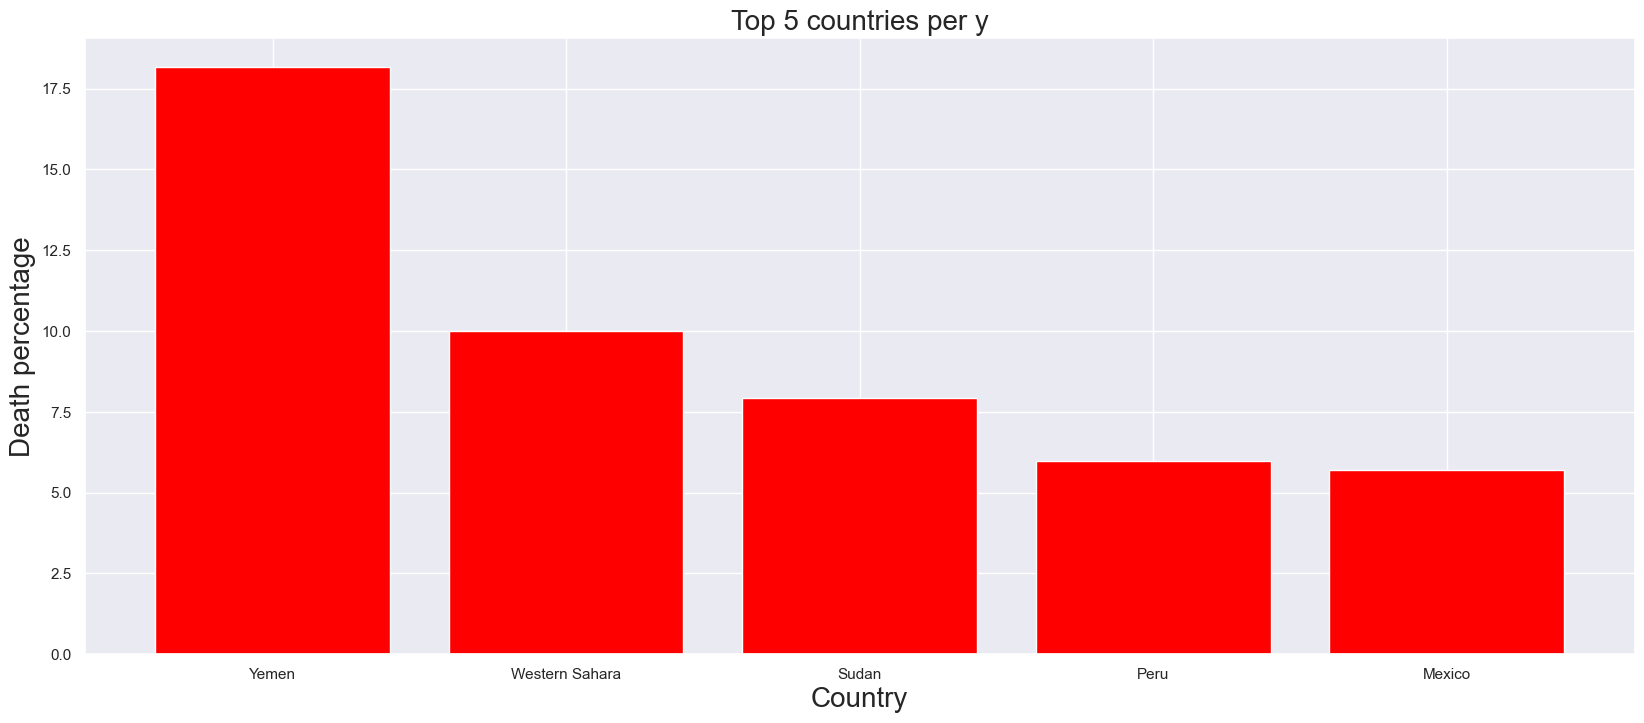

In [87]:
for column in columns:
  top5 = train.nlargest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color='red',alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

Since each country had its own factors for getting into the rating and anti-rating on the situation with covid, then in one chart an analysis will be carried out for 1 country. In general, the factors contributing to mortality and the spread of infection in each country are very similar.
* 1 graph does not require analysis, here is the population in each of the countries :)
* On the 2nd chart, I would like to stay on the USA. Having studied a lot of information, I would like to note some factors that contributed to the spread of covid in this country: expensive and inaccessible medicine, ignoring anti-covid measures and the trump factor.
* On the 3rd chart, I would like to talk about Russia. Not falling into the ranking by population, this country was ranked by the number of deaths. Despite all the measures taken by the government and the Ministry of Health, the number of deaths was very high. The factors that influenced such mortality are the low level of medicine in small towns, lack of trust in doctors, self-treatment, a large proportion of the elderly population with chronic diseases.
* Figures 4 and 5 show countries with small populations, so this comparison is incorrect.
* On graphs 5 and 6, I would like to consider Peru, it is the leader of our anti-rating according to these indicators. Almost 200 thousand deaths from COVID-19 in Peru occurred due to the instability of the healthcare system and the lack of foresight. This was stated by the Minister of Health of Peru, Horacio Cevallos. These conclusions can be applied to the rest of the countries in Figure 6.

## I propose to look at countries less affected by this insidious disease.

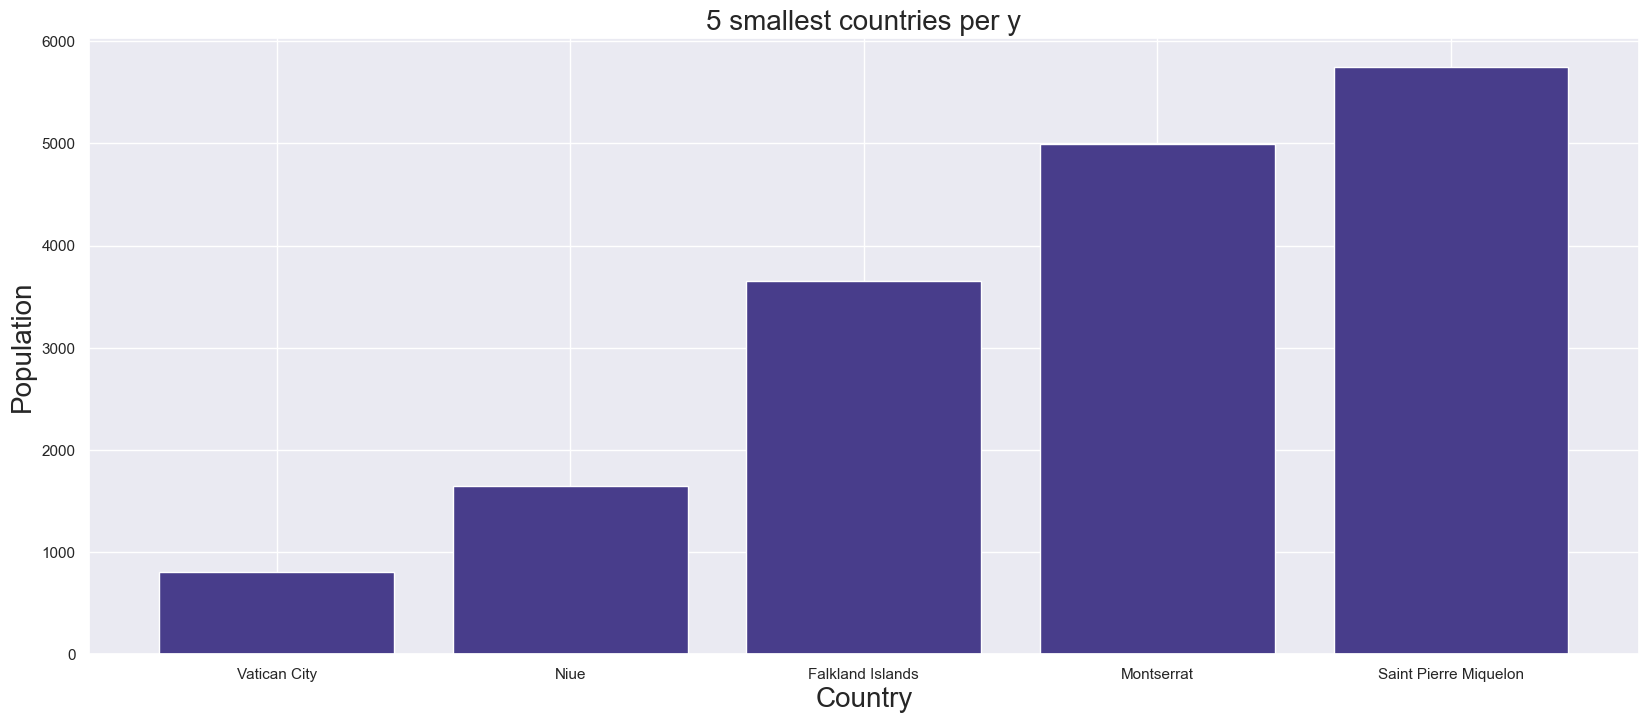

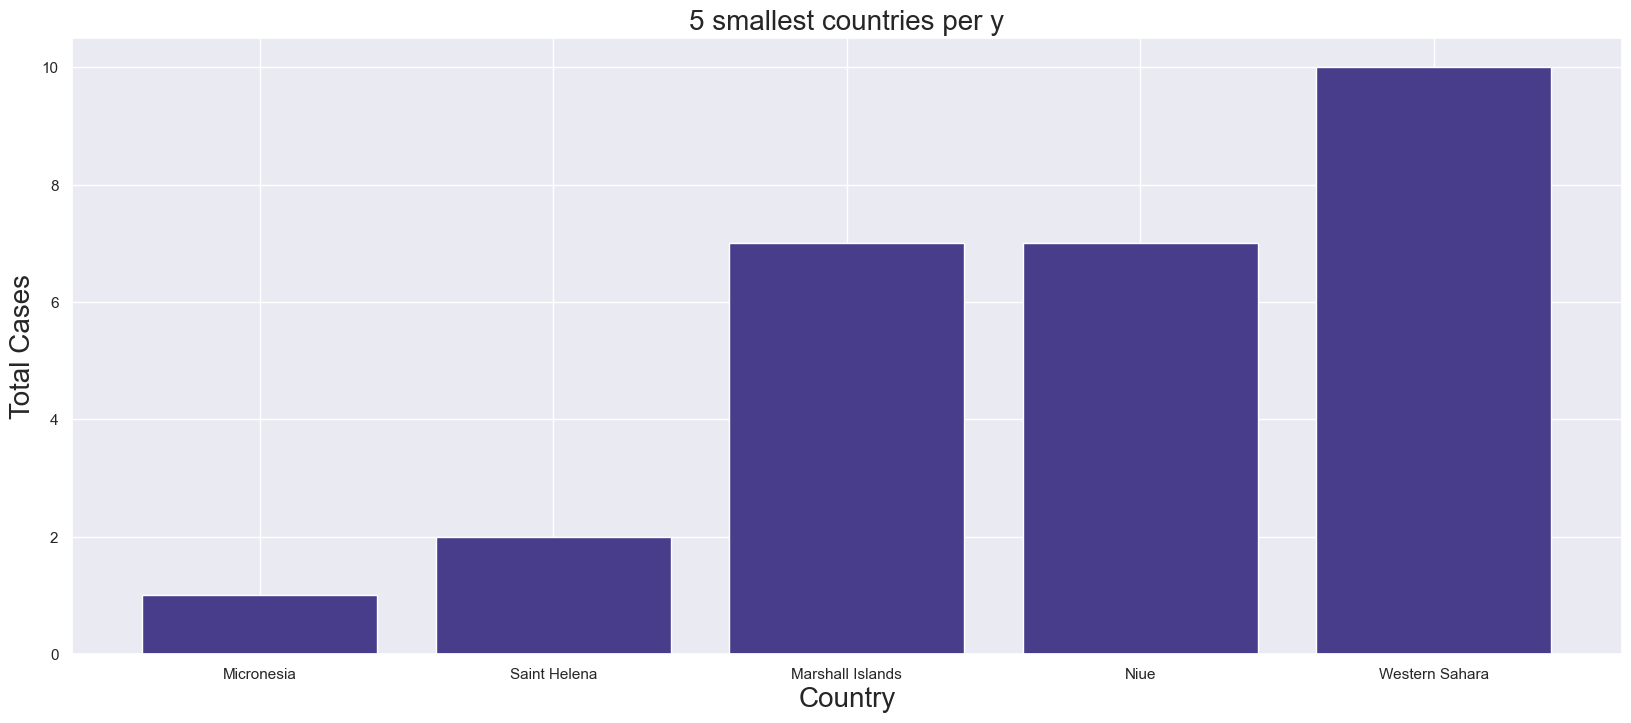

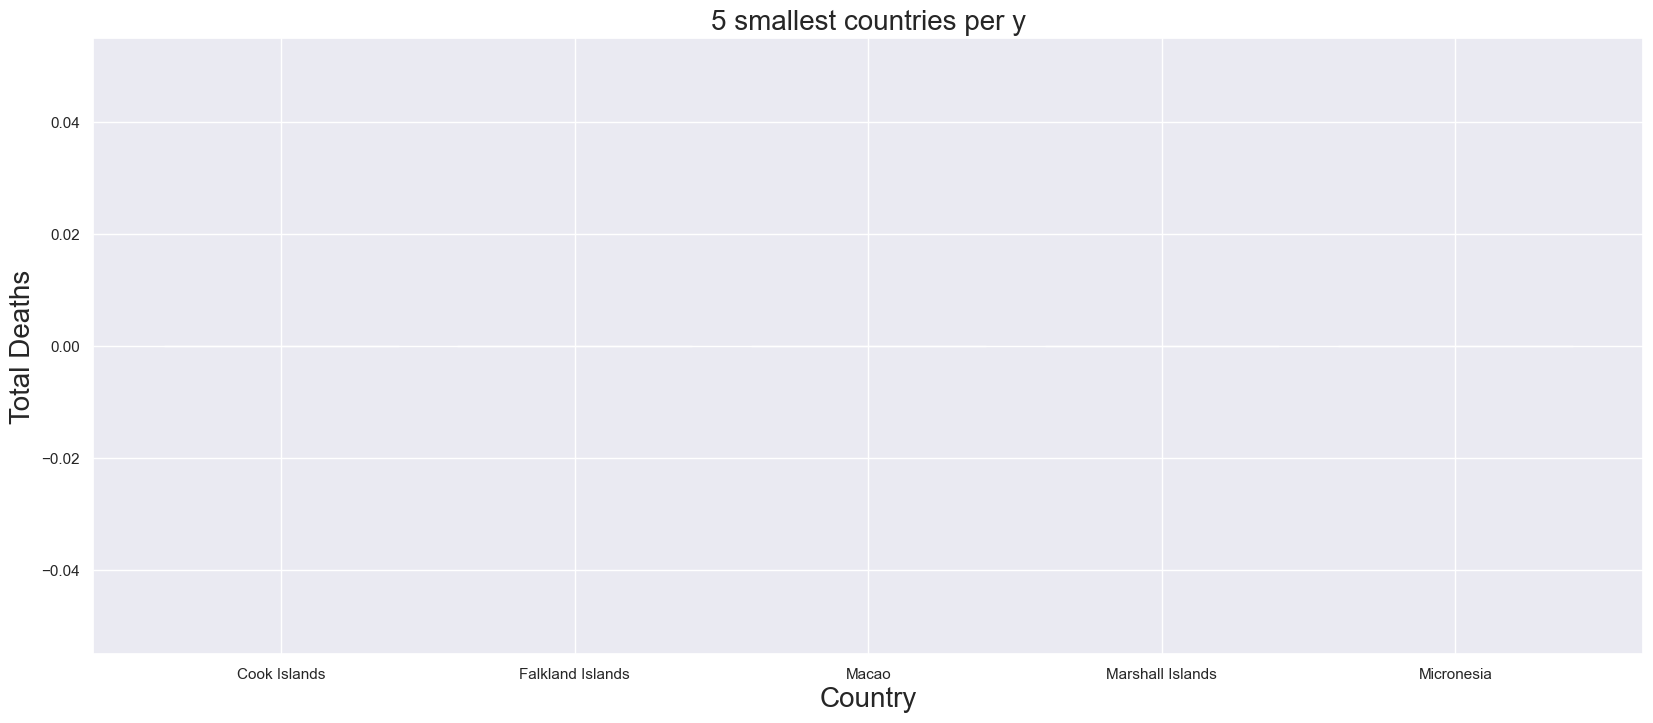

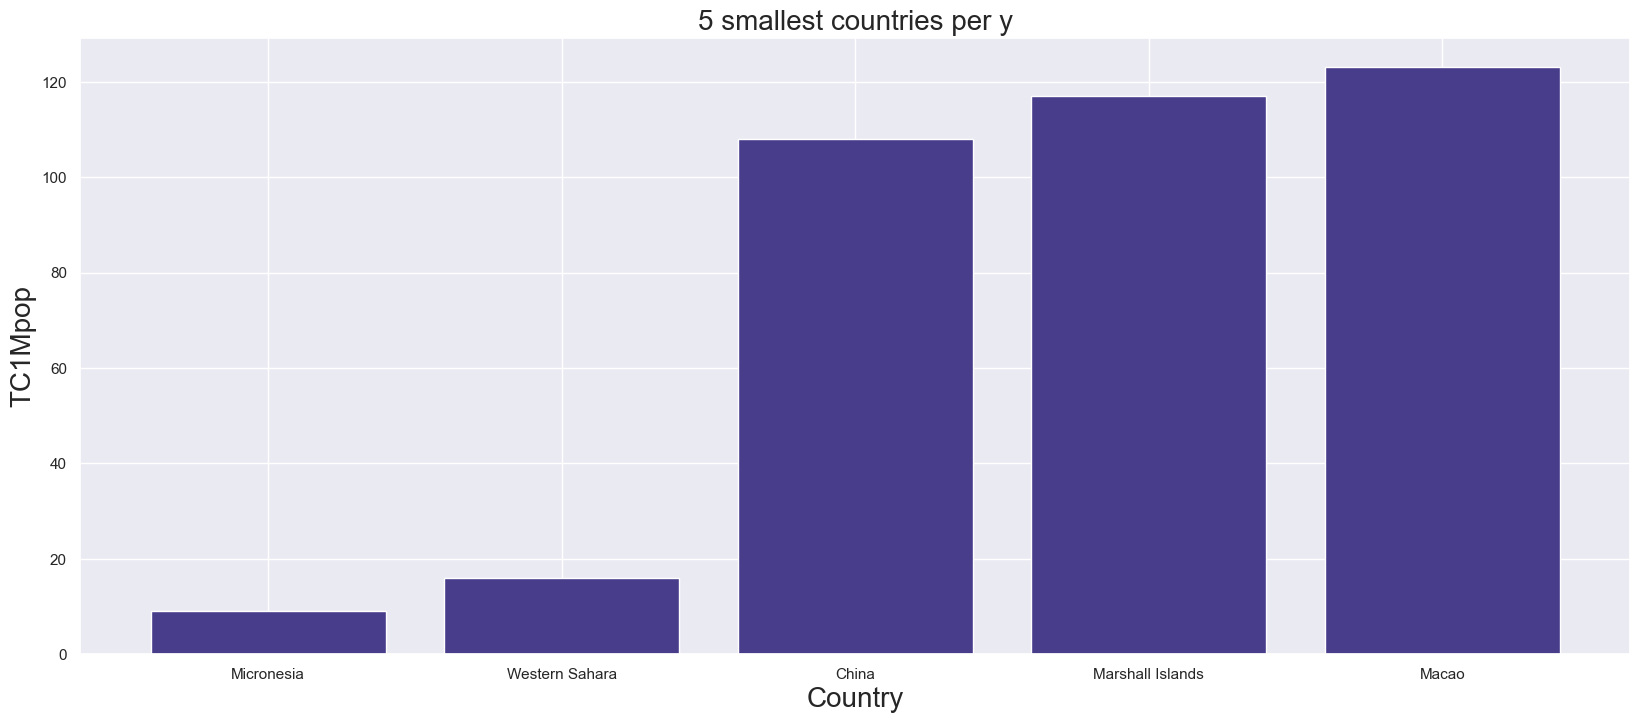

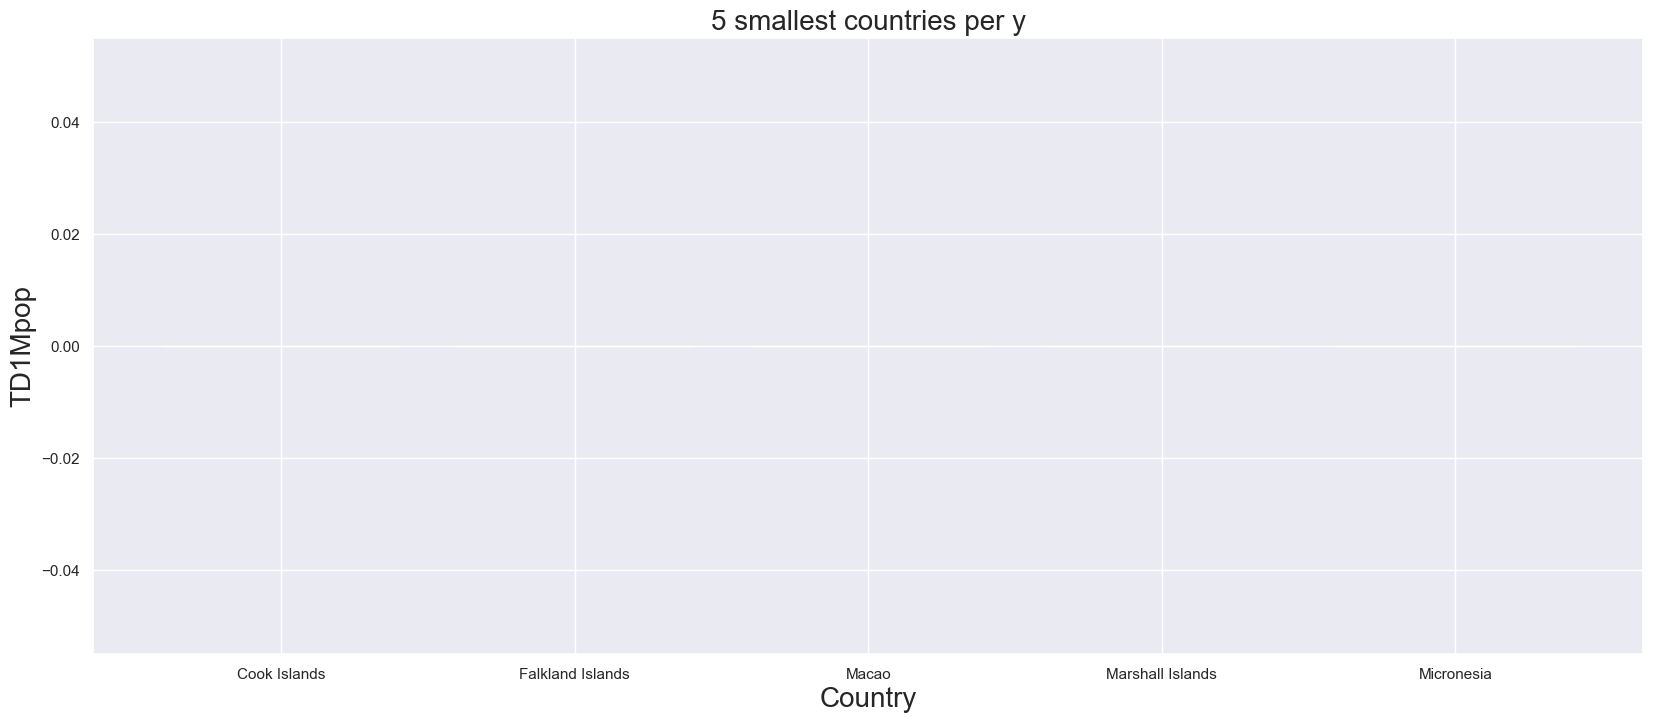

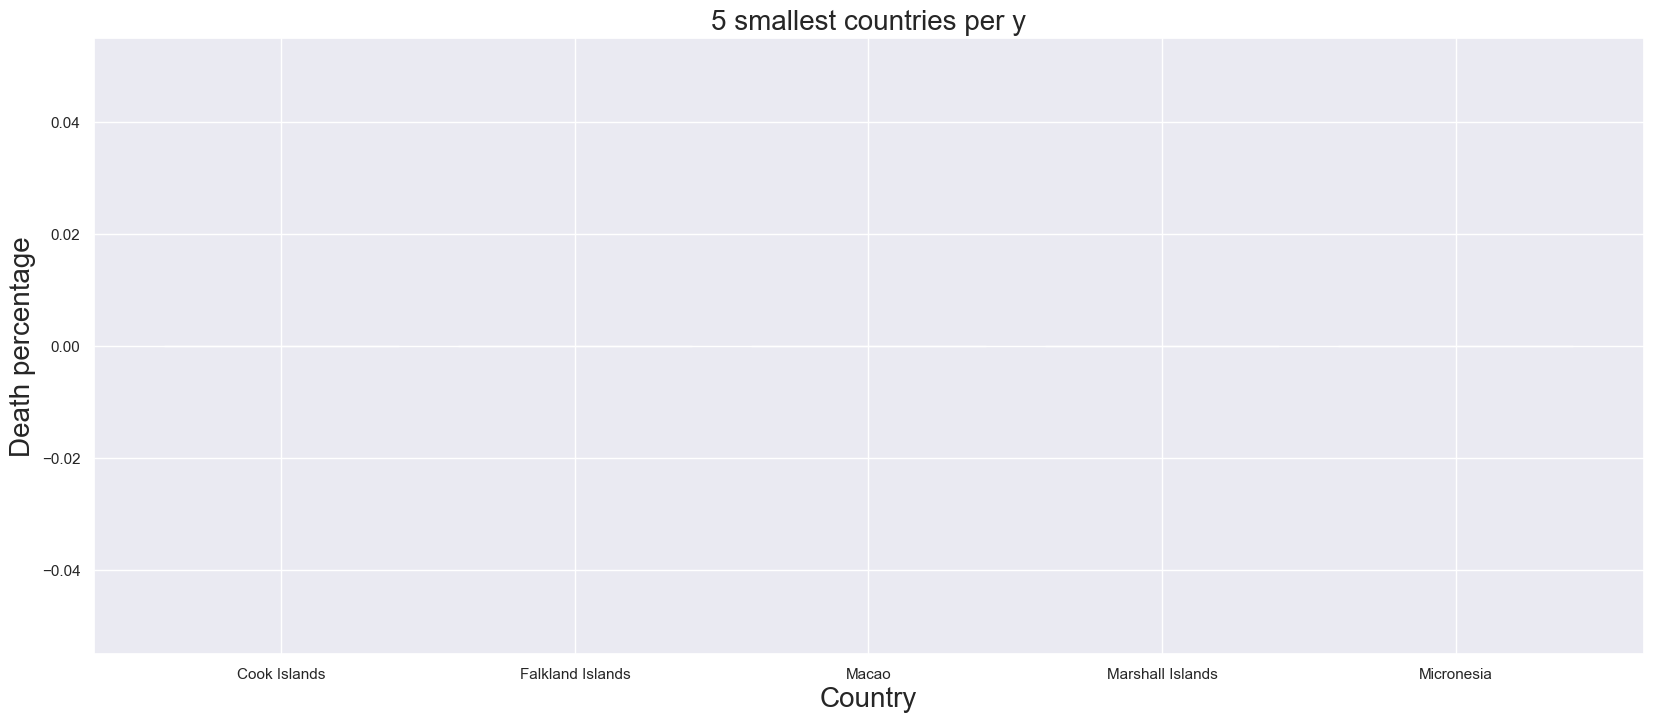

In [88]:
for column in columns:
  top5 = train.nsmallest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color="#483D8B",alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("5 smallest countries per y", fontsize = 20)
  plt.show()

* All graphs show the state of affairs in the dwarf states, except for China. The Chinese authorities are doing everything possible to combat the spread of the virus. Since China had a lot of experience in combating this disease, a lockdown was immediately introduced, measures to disinfect city streets, mass testing and an effective healthcare system. Despite the Chinese origin of the virus, as well as the high population density, it was possible to prevent the spread of the virus in the country. There is only one conclusion - either China is doing well and reacting very quickly to the difficulties that have arisen, or they have been preparing for this pandemic for a long time.

## I propose to compile a small anti-rating of European countries according to various indicators, as well as draw a conclusion for individual countries.

In [90]:
Europe=train[train['Continent']=='Europe']

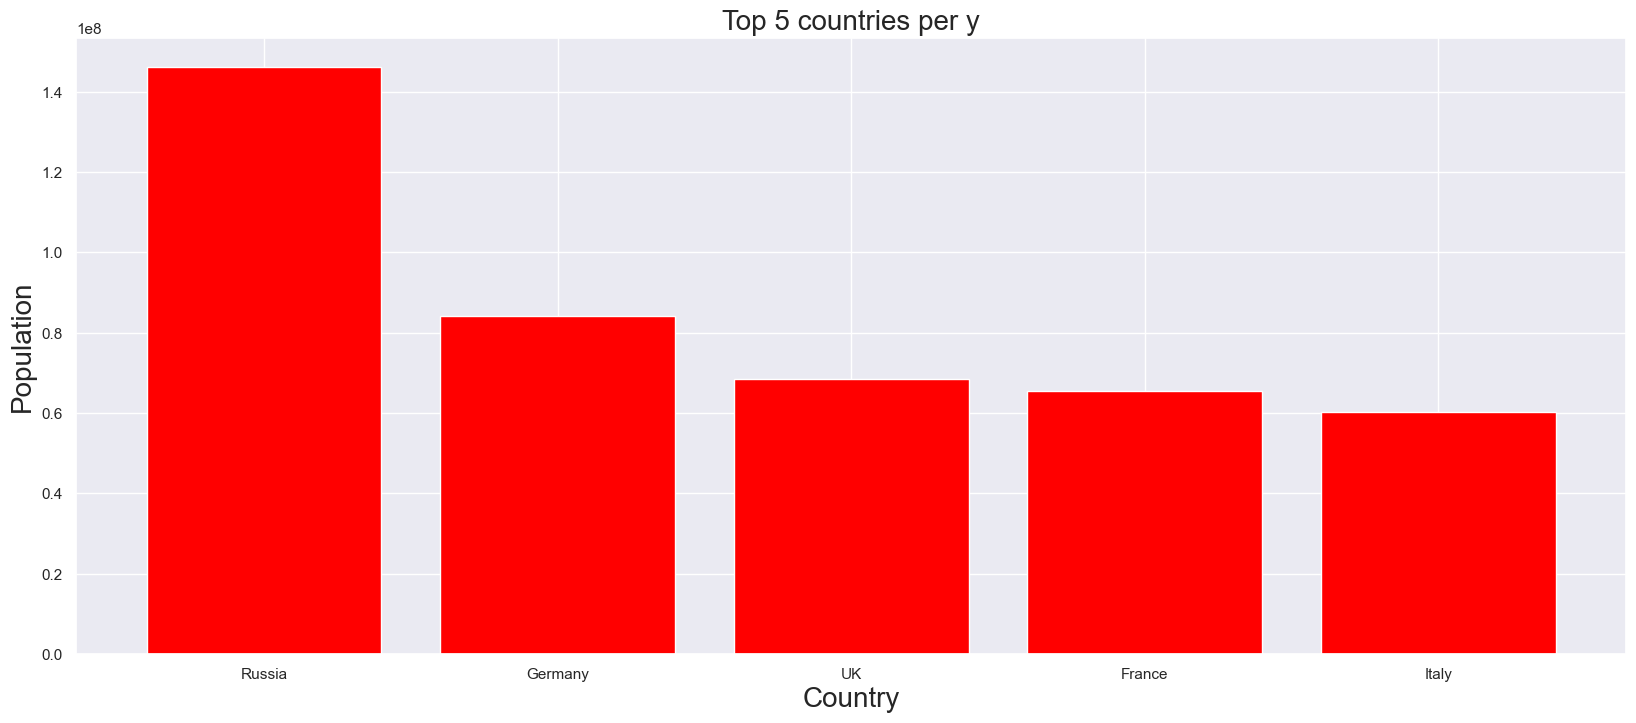

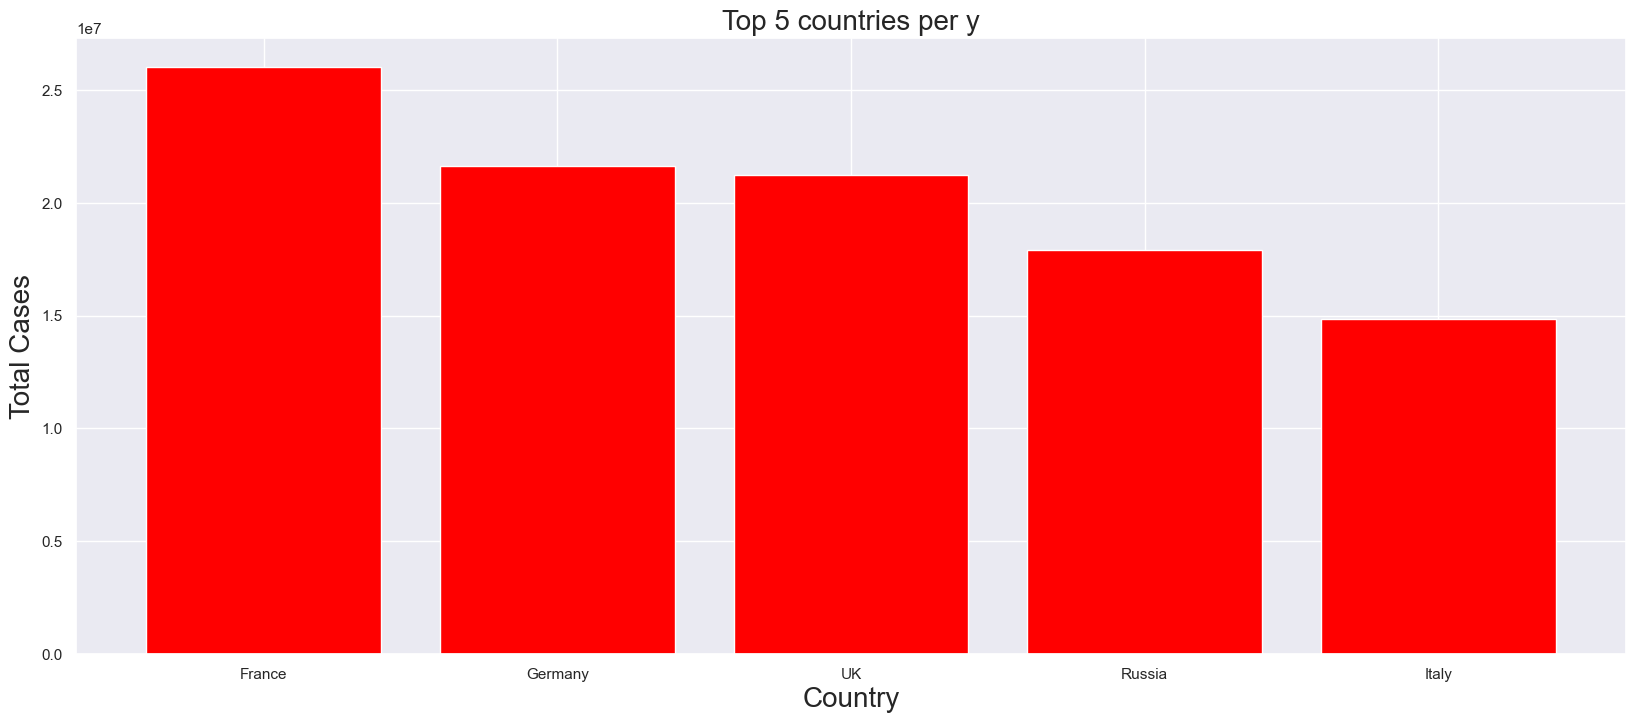

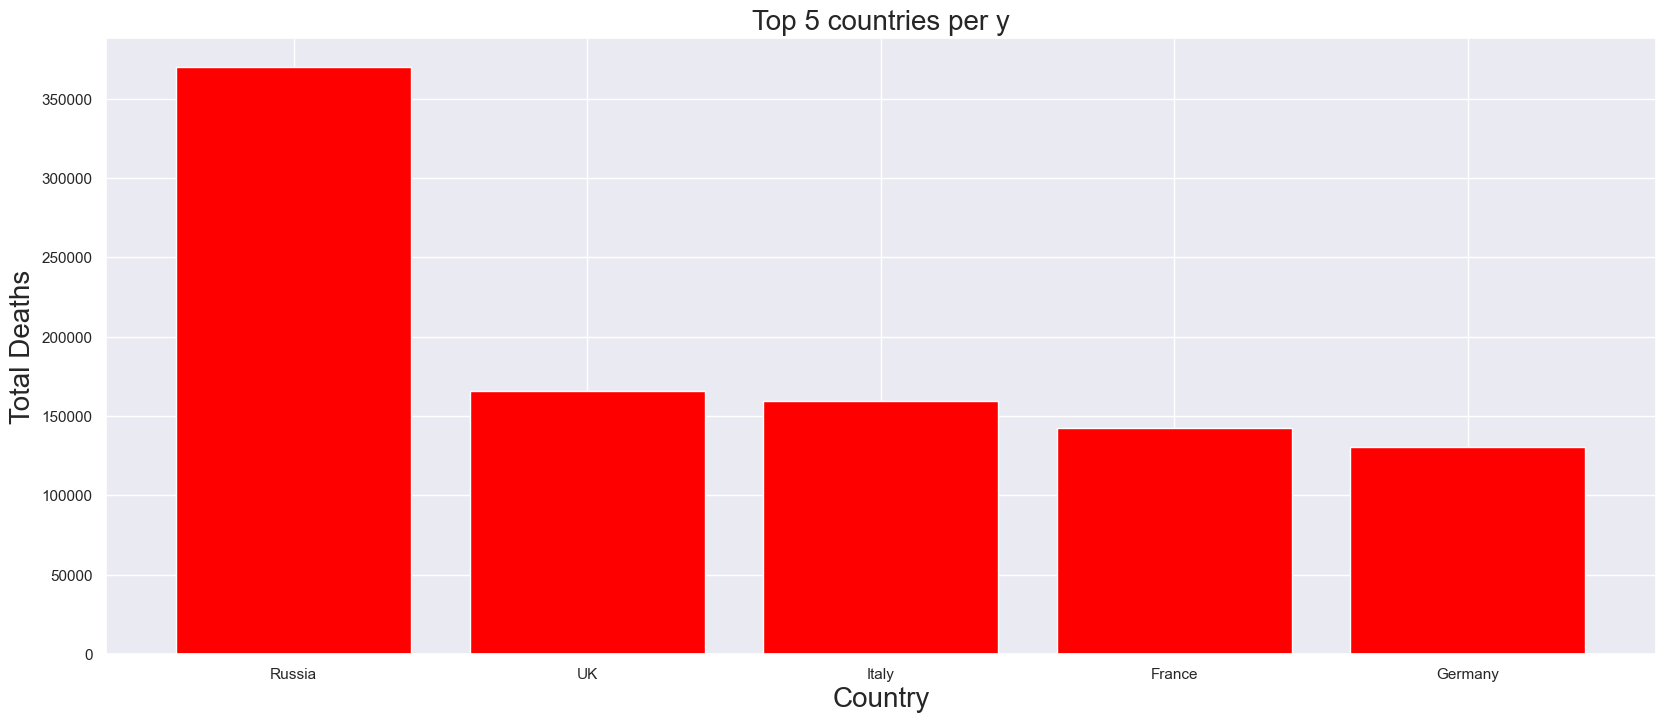

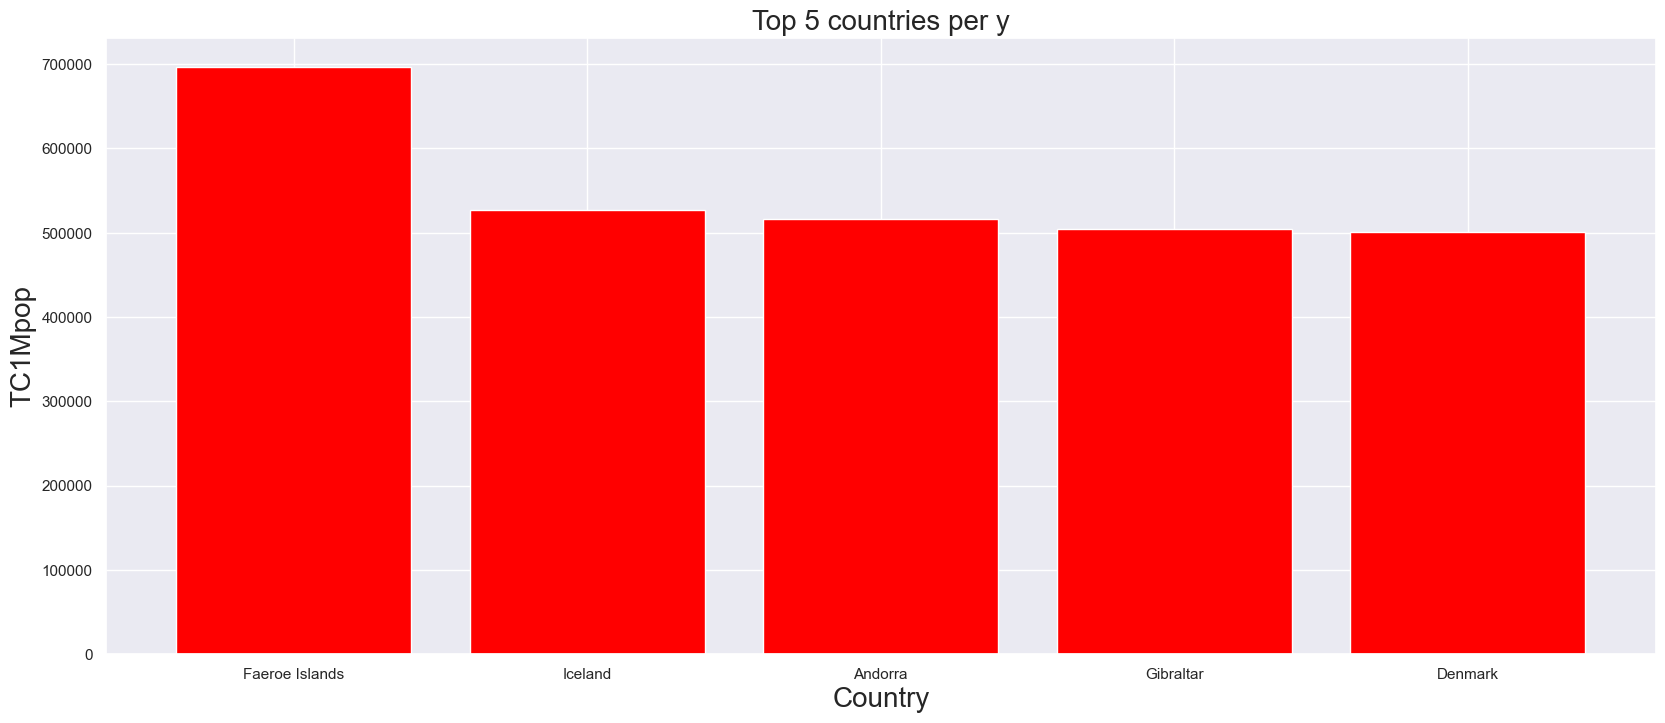

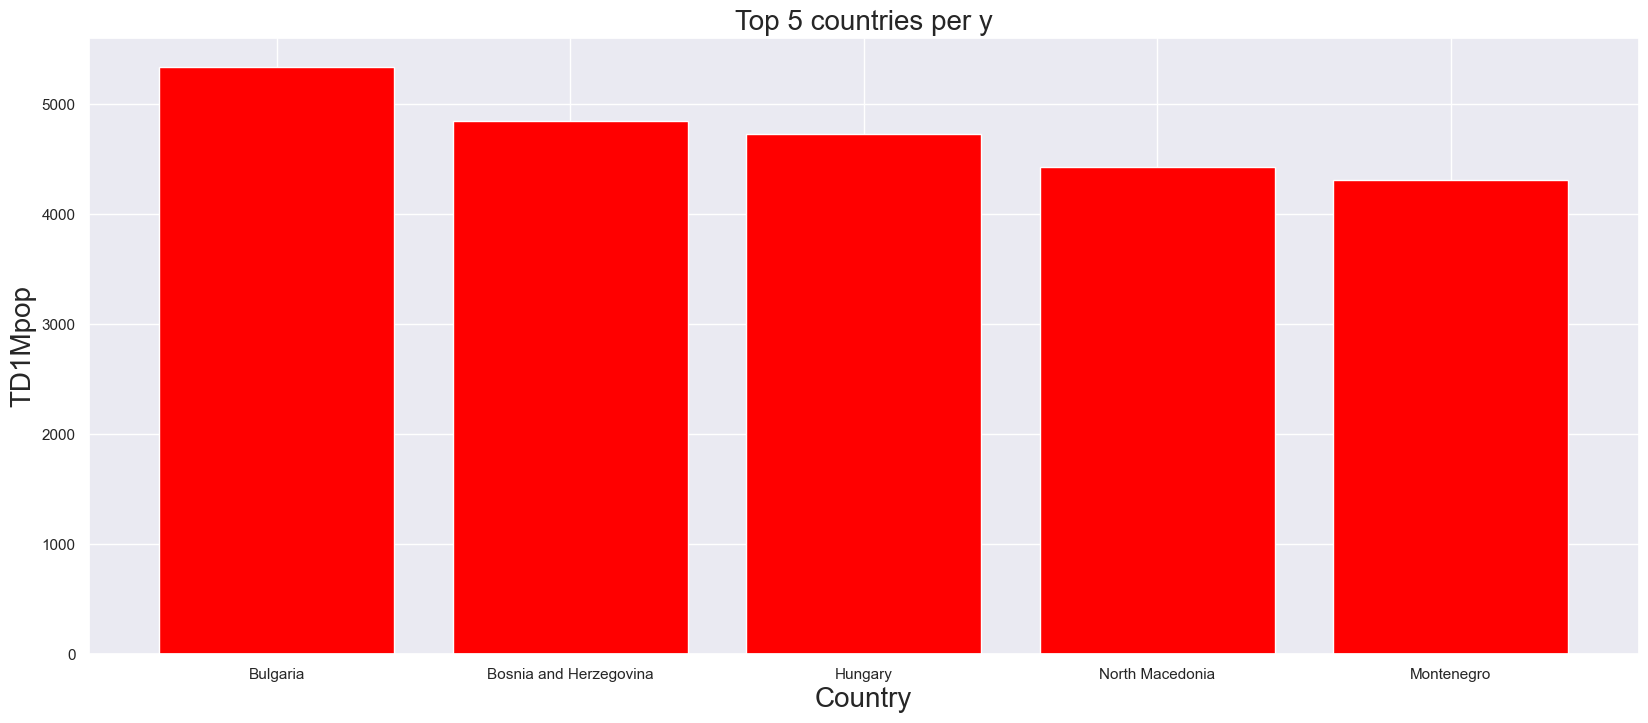

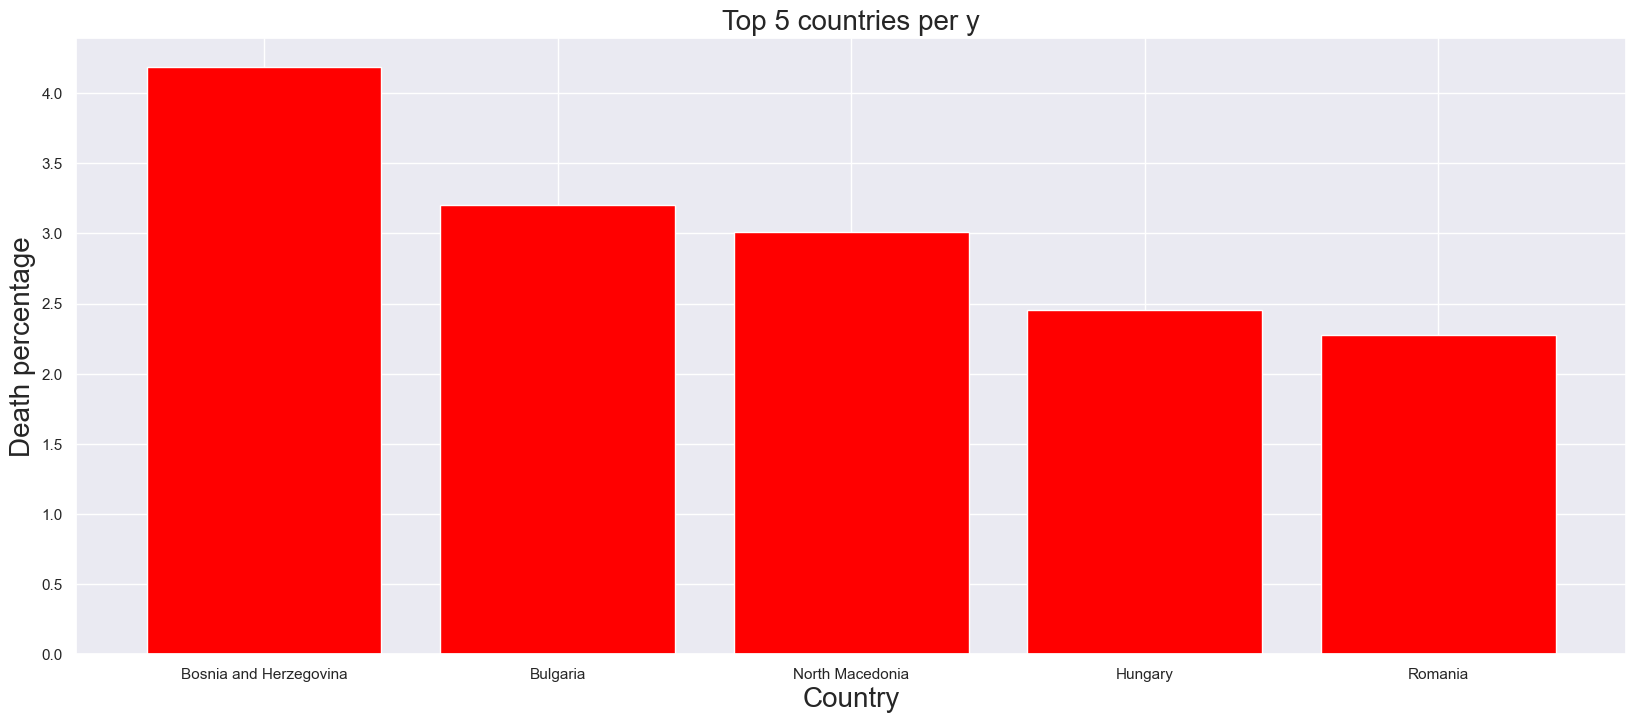

In [91]:
for column in columns:
  top5 = Europe.nlargest(5,column)
  plt.figure(figsize=(20,8))
  plt.bar(top5['Country'], top5[column],color="red",alpha=1)
  plt.ylabel(column, fontsize = 20)
  plt.xlabel("Country", fontsize = 20)
  plt.title("Top 5 countries per y", fontsize = 20)
  plt.show()

The general conclusions are confirmed: in the presence of developed medicine, mortality was low, the incidence correlates with the size of the population and is explained by the lack of measures to prevent the spread of coronavirus infection.

## Let us analyze the interaction of variables with each other.

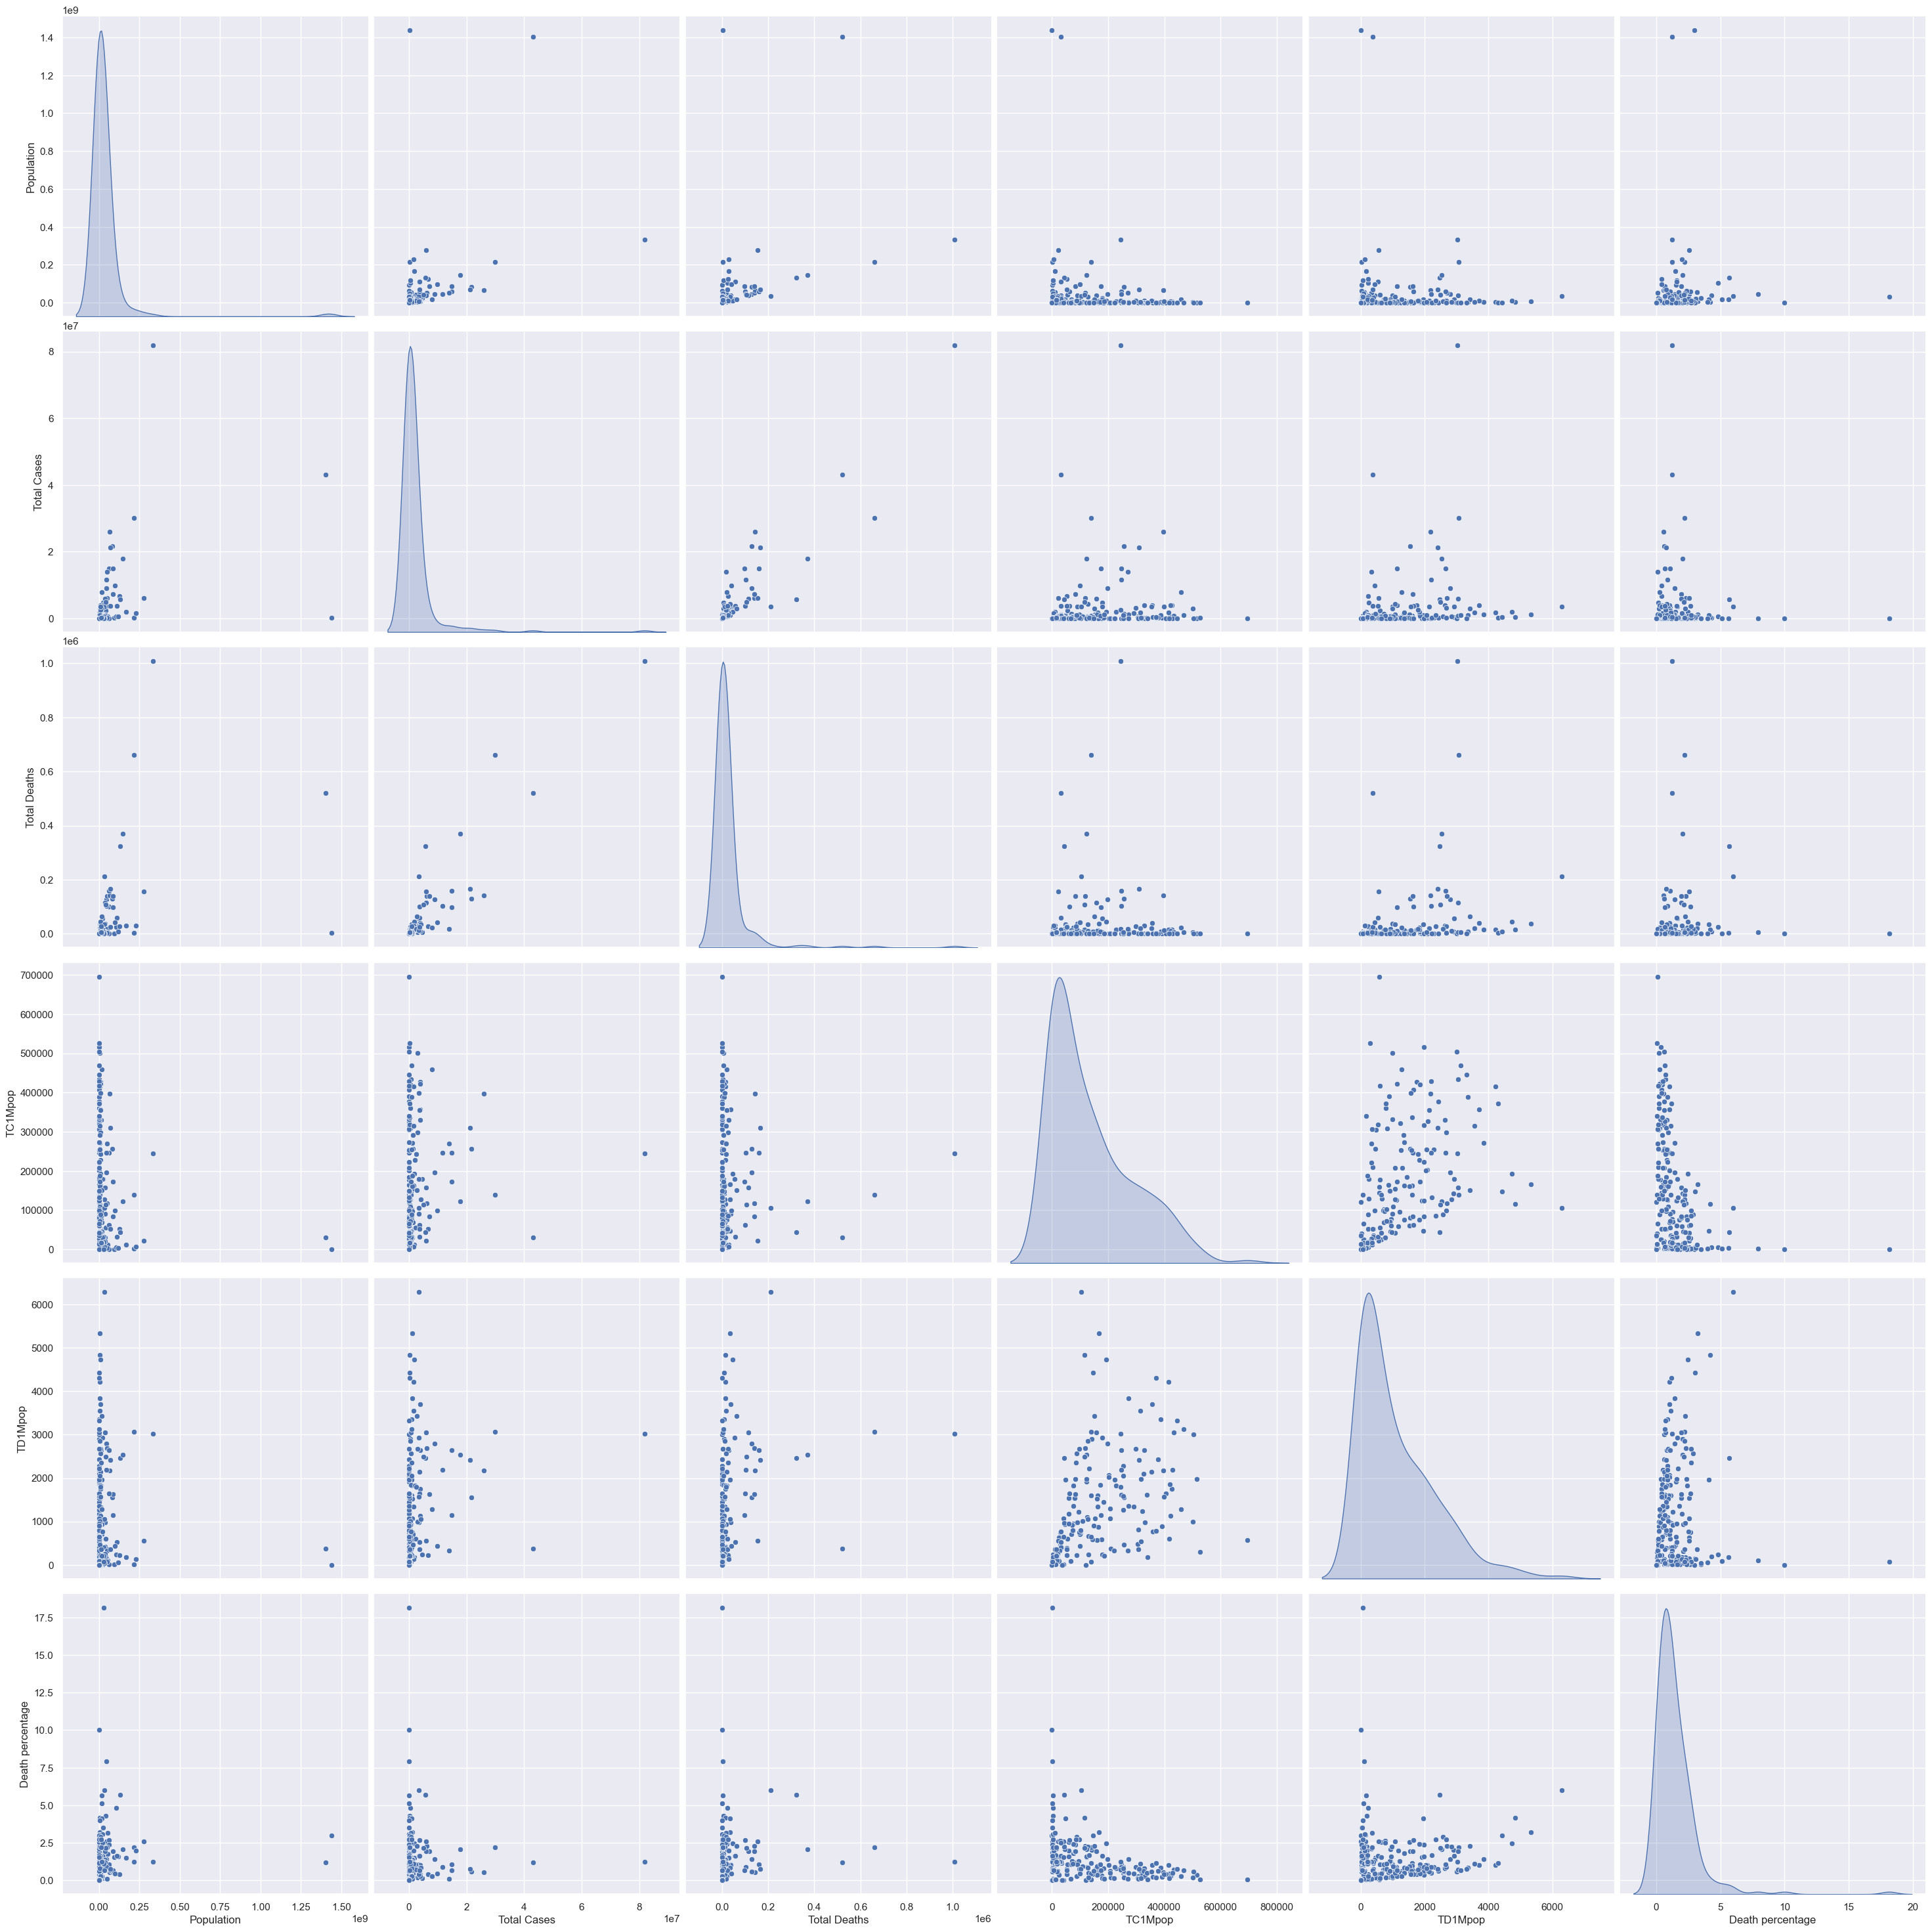

In [92]:
sns.set()
sns.pairplot(train[columns],height = 5 ,kind ='scatter',diag_kind='kde')
plt.show()

From the graphs presented, it can be concluded that in most countries the situation was very similar.

## Let's analyze information outliers.

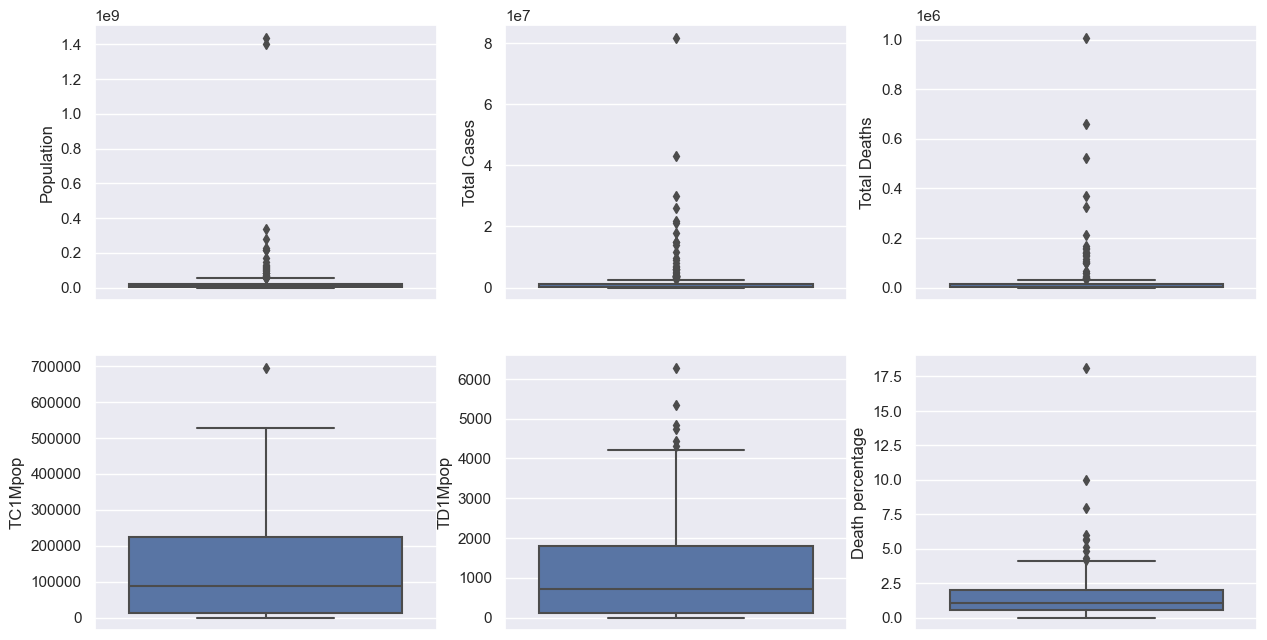

In [93]:
i=1
plt.figure(figsize=(15,25))
for feature in columns:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature])
    i+=1
    

It follows from the presented graphs that there are few outliers of information, but they are present. When handling outliers, it is important to remember to distinguish outliers from unique information.

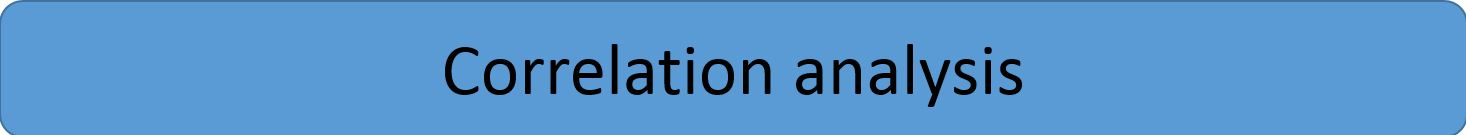

## Build a correlation table.
I think that a more informative indicator for constructing this table will be the number of deaths per 1 million population.

In [94]:
correlation = train.corr()
print(correlation['TD1Mpop'].sort_values(ascending = False),'\n')

TD1Mpop             1.000000
TC1Mpop             0.508630
Total Deaths        0.289201
Total Cases         0.216272
Death percentage    0.061088
Population         -0.066485
Name: TD1Mpop, dtype: float64 



Index(['TD1Mpop', 'TC1Mpop', 'Total Deaths', 'Total Cases', 'Death percentage',
       'Population'],
      dtype='object')


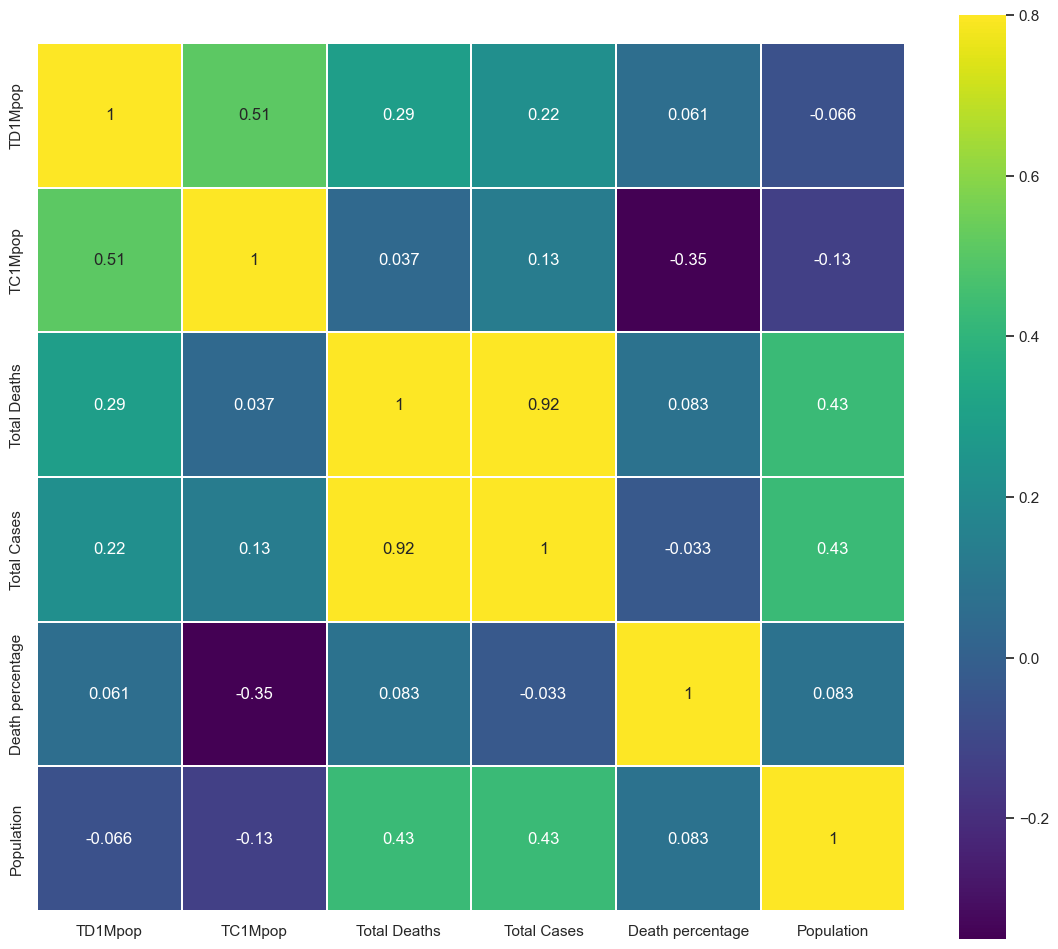

In [95]:
k= 10
cols = correlation.nlargest(k,'TD1Mpop')['TD1Mpop'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

There is a high correlation between the number of cases and the number of deaths, which is generally logical.

I propose to convert the table to a form where cluster analysis can be carried out. To do this, you need to remove the continent variable and make the country variable an index.

In [96]:
train=train.drop(['Continent'],axis=1).set_index('Country')

In [97]:
train

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
Country,,,,,,
Afghanistan,40462186,177827,7671,4395,190,4.313743
Albania,2872296,273870,3492,95349,1216,1.275058
Algeria,45236699,265691,6874,5873,152,2.587216
Andorra,77481,40024,153,516565,1975,0.382271
Angola,34654212,99194,1900,2862,55,1.915438
...,...,...,...,...,...,...
Wallis and Futuna,10894,454,7,41674,643,1.541850
Western Sahara,623031,10,1,16,2,10.000000
Yemen,30975258,11806,2143,381,69,18.151787


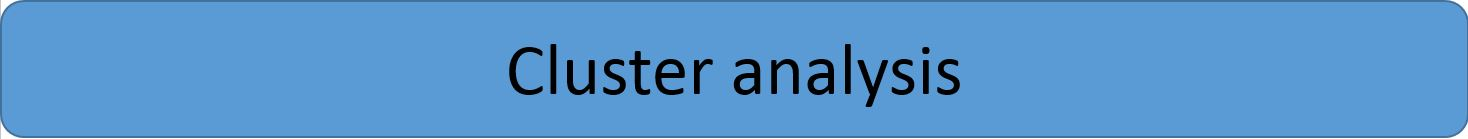

Let's carry out a cluster analysis, for this we will transform our data to the format [0,1].

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()
names = train.columns
d = scaler.fit_transform(train)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Population,Total Cases,Total Deaths,TC1Mpop,TD1Mpop,Death percentage
0,0.028111,0.002173,0.007608,0.006301,0.030226,0.237648
1,0.001995,0.003346,0.003464,0.136976,0.193446,0.070244
2,0.031429,0.003246,0.006818,0.008425,0.024181,0.142532
3,0.000053,0.000489,0.000152,0.742141,0.314190,0.021060
4,0.024076,0.001212,0.001885,0.004099,0.008750,0.105523


C:\Users\18179\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


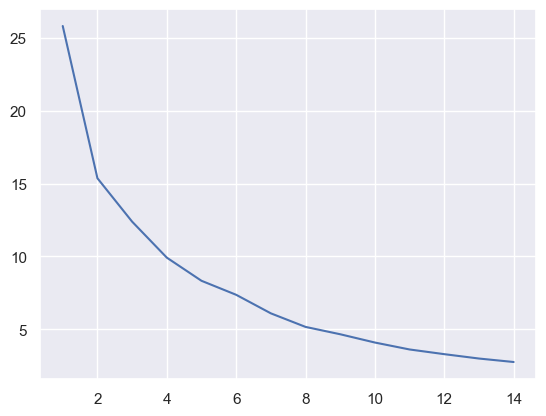

In [100]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled_df)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.show()

The optimal number of clusters is 4.

Since there is not much data, there will be no outlier processing, but I want to show how you can quickly process outliers using the LocalOutlierFactor method. By changing the hyperparameters of the LocalOutlierFactor method, you can control the number of outliers to be removed.

In [101]:
from sklearn.neighbors import LocalOutlierFactor

In [102]:
clf = LocalOutlierFactor(n_neighbors=10, contamination='auto')
y_pred = clf.fit_predict(train) 

In [103]:
train['Out']=y_pred

In [106]:
Out=train[train['Out']!=1]

In [107]:
Out.shape

(11, 7)

In [108]:
train=train.drop('Out',axis=1)

Recommendations for removing outliers are no more than 1-2 percent, otherwise you can lose important information.